In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pokemon = pd.read_csv('pokemon.csv')

In [72]:
fuel_econ = pd.read_csv('fuel_econ.csv')

In [6]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [73]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


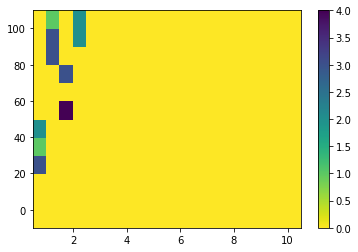

In [46]:
bins_x = np.arange(0.5, 10.5+0.5, 0.5)
bins_y = np.arange(-10, 110+10, 10)


h2d=plt.hist2d(data=fuel_econ,x='displ',y='co2',cmap='viridis_r',bins=[bins_x,bins_y])
plt.colorbar();

In [47]:
#Annotations

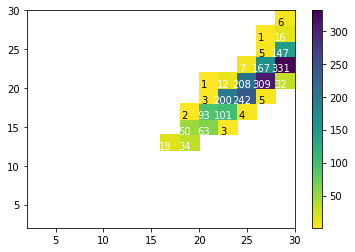

In [127]:
bins_x = np.arange(2, 30+2, 2)
bins_y = np.arange(2, 30+2, 2)

counts = h2d[0]
h2d=plt.hist2d(data=fuel_econ,x='highway',y='comb',cmap='viridis_r',bins=[bins_x,bins_y],cmin=0.5)
plt.colorbar();



for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c>=7:
            plt.text(bins_x[i]+0.5,bins_y[j]+0.5,int(c),color='white',ha='center',va='center')
        elif c > 0 :
            plt.text(bins_x[i]+0.5,bins_y[j]+0.5,int(c),color='black',ha='center',va='center')

   

In [83]:
sedan_class = ['Minicompact Cars','Subcompact Cars','Compact Cars','Midsize Cars','Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True,categories=sedan_class)

fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

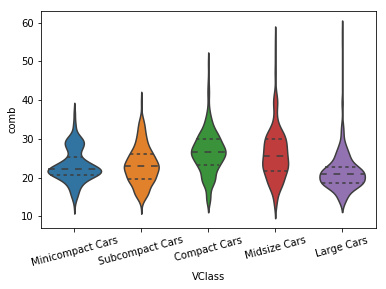

In [99]:
sb.violinplot(data=fuel_econ, x='VClass', y='comb',inner='quartile');
plt.xticks(rotation=15);

In [100]:
fuel_econ['trans_type']=fuel_econ['trans'].apply(lambda x : x.split()[0])
fuel_econ.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic


In [102]:
ct_counts = fuel_econ.groupby(['VClass','trans_type']).size()
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [103]:
ct_counts = ct_counts.reset_index(name='count') #converting series to df

In [105]:
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [106]:
ct_counts = ct_counts.pivot(index='VClass',columns='trans_type',values='count')

In [107]:
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


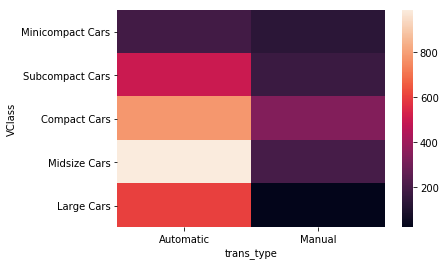

In [108]:
sb.heatmap(ct_counts)

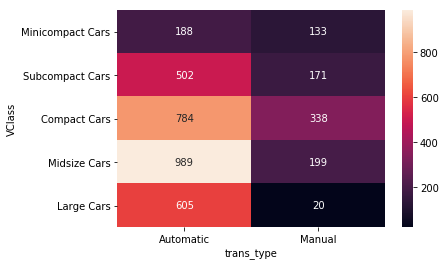

In [110]:
sb.heatmap(ct_counts,annot=True,fmt='d')

In [113]:
#FACETING

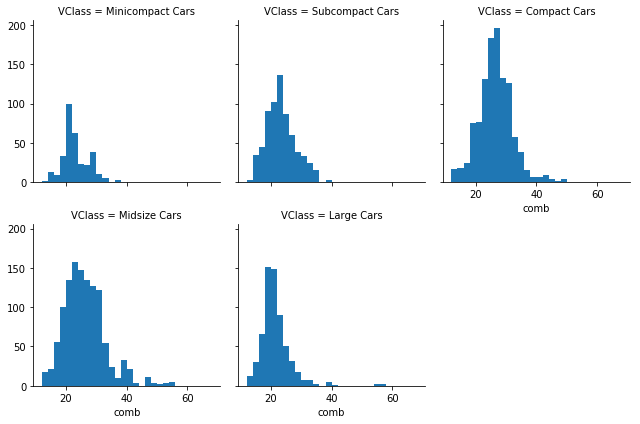

In [119]:
g = sb.FacetGrid(data=fuel_econ,col='VClass',col_wrap=3)
g.map(plt.hist,'comb',bins=np.arange(12,58+12,2))


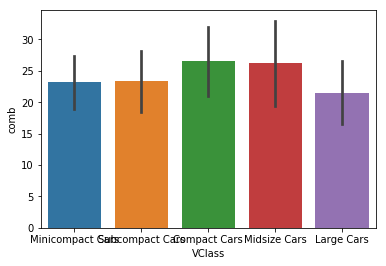

In [120]:
sb.barplot(data=fuel_econ,x='VClass',y='comb',ci='sd')

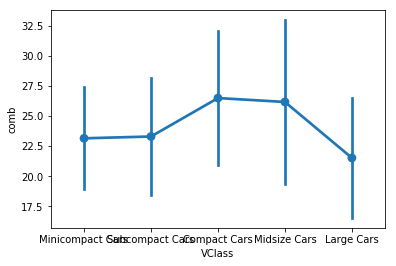

In [121]:
sb.pointplot(data=fuel_econ,x='VClass',y='comb',ci='sd')